In [1]:
import numpy as np
import pandas as pd

#### Loading the datset

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
#introduing null values
for col in ['sqft_lot', 'bathrooms']:
    df.loc[df.sample(frac=0.05, random_state=42).index, col] = np.nan

In [7]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms        1081
sqft_living         0
sqft_lot         1081
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
#boxplot for price, sqft_living, bedroom
import matplotlib.pyplot as plt
import seaborn as sns

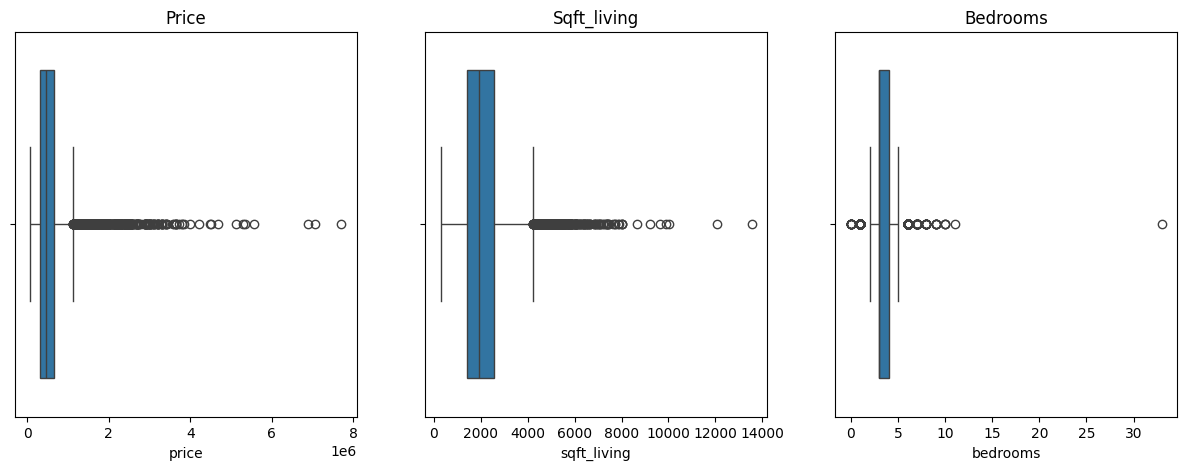

In [9]:
plt.figure(figsize=(15,5))

for i,col in enumerate(['price', 'sqft_living','bedrooms'], start=1):
    plt.subplot(1,3,i)
    sns.boxplot(x=df[col])
    plt.title(col.capitalize())

plt.show()

In [10]:
for col in ['price','sqft_living','bedrooms']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    df = df[(df[col] >= lower) & (df[col] <= upper)]

In [11]:
#converting the date column into datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

#date based features
df['sale_year'] = df['date'].dt.year
df['sale_month'] = df['date'].dt.month
df['house_age'] = df['sale_year'] - df['yr_built']

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19687 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             19687 non-null  int64         
 1   date           19687 non-null  datetime64[ns]
 2   price          19687 non-null  float64       
 3   bedrooms       19687 non-null  int64         
 4   bathrooms      18713 non-null  float64       
 5   sqft_living    19687 non-null  int64         
 6   sqft_lot       18713 non-null  float64       
 7   floors         19687 non-null  float64       
 8   waterfront     19687 non-null  int64         
 9   view           19687 non-null  int64         
 10  condition      19687 non-null  int64         
 11  grade          19687 non-null  int64         
 12  sqft_above     19687 non-null  int64         
 13  sqft_basement  19687 non-null  int64         
 14  yr_built       19687 non-null  int64         
 15  yr_renovated   19687 non

In [13]:
#renovation_status
df['renovation_status'] = (df['yr_renovated']!=0).astype(int)

df['age_since_renovation'] = np.where(df['renovation_status'] == 1, 
                                      df['sale_year']-df['yr_renovated'], 
                                      df['house_age'])

In [14]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,sale_year,sale_month,house_age,renovation_status,age_since_renovation
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650.0,1.0,0,0,...,98178,47.5112,-122.257,1340,5650,2014,10,59,0,59
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242.0,2.0,0,0,...,98125,47.7210,-122.319,1690,7639,2014,12,63,1,23
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000.0,1.0,0,0,...,98028,47.7379,-122.233,2720,8062,2015,2,82,0,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000.0,1.0,0,0,...,98136,47.5208,-122.393,1360,5000,2014,12,49,0,49
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080.0,1.0,0,0,...,98074,47.6168,-122.045,1800,7503,2015,2,28,0,28


In [15]:
#ratio calcuation columns
df['sqft_living_per_floor'] = np.where(df['floors'] != 0 , df['sqft_living'] / df['floors'] , df['sqft_living'])
df['bath_per_bed'] = np.where(df['bedrooms'] != 0 , df['bathrooms'] / df['bedrooms'] , df['bathrooms'])

#### Preprocessing Pipeline

In [16]:
numerical = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement', 'house_age', 
                'age_since_renovation','sqft_living_per_floor','bath_per_bed']
categorical = ['waterfront', 'view','zipcode']
passthrough = ['grade','condition','renovation_status']

In [21]:
X = df[numerical + categorical + passthrough]
y = df['price']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
print(f'Train Shape : {X_train.shape}')
print(f'Test Shape : {X_test.shape}')

Train Shape : (15749, 17)
Test Shape : (3938, 17)


In [ ]:
#making the numerical and categorical pipeline and combining them into preprocessor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

numerical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

categorical_transformer = Pipeline(
    steps=[
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num',numerical_transformer, numerical),
        ('cat',categorical_transformer, categorical),
        ('pass', 'passthrough', passthrough)
    ]
)

In [26]:
preprocessor

,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


### Task 3

In [27]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

model = {
    'RandomForest' : RandomForestRegressor(random_state=42),
    'GradientBoosting' : GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state = 42, objective = 'reg:squarederror')
}

pipelines = {
    name : Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)])
    for name, model in model.items()
}

In [31]:
pram_grids = {
    'RandomForest' : {
        'regressor__n_estimators' : [100,200],
        'regressor__max_depth' : [None, 10 , 20]
    },
    'GradientBoosting' : {
        'regressor__n_estimators' : [100,200],
        'regressor__learning_rate' : [0.05, 0.1],
        'regressor__max_depth' : [3,5]
    },
    'XGBoost' : {
        'regressor__n_estimators' : [100,200],
        'regressor__learning_rate' : [0.05,0.1],
        'regressor__max_depth' : [3,5]
    }
}

In [32]:
best_models = {}

for name, pipeline in pipelines.items():
    grid_search = GridSearchCV(
        pipeline, param_grid=pram_grids[name],
        cv = 3,
        scoring='r2',
        n_jobs=-1,
        verbose=1
    )
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search
    print(f'Best {name} params : {grid_search.best_params_}')
    print(f'Best {name} CV score : {grid_search.best_score_}')

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best RandomForest params : {'regressor__max_depth': None, 'regressor__n_estimators': 200}
Best RandomForest CV score : 0.769420209152857
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best GradientBoosting params : {'regressor__learning_rate': 0.1, 'regressor__max_depth': 5, 'regressor__n_estimators': 200}
Best GradientBoosting CV score : 0.8238621832023548
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best XGBoost params : {'regressor__learning_rate': 0.1, 'regressor__max_depth': 5, 'regressor__n_estimators': 200}
Best XGBoost CV score : 0.8222662792003522


### Task 4

In [33]:
#final evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

best_model_name = max(best_models, key = lambda name : best_models[name].best_score_)
best_model = best_models[best_model_name].best_estimator_

print(f'Best Model : {best_model_name}')
print(f'Best Parameters : {best_models[best_model_name].best_params_}')

y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R2 Score : {r2}')
print(f'MAE : {mae}')
print(f'RMSE : {rmse}')

Best Model : GradientBoosting
Best Parameters : {'regressor__learning_rate': 0.1, 'regressor__max_depth': 5, 'regressor__n_estimators': 200}
R2 Score : 0.8306136255985775
MAE : 61447.36345836816
RMSE : 84154.25514146761


In [34]:
#comparing the rmse with original notebook
orig_rmse = 209786.255677
comparision_df = pd.DataFrame({
    'Model' : ['Original Rmse', f'Tuned {best_model_name}'],
    'RMSE' : [orig_rmse, rmse]
})
print(comparision_df)

                    Model           RMSE
0           Original Rmse  209786.255677
1  Tuned GradientBoosting   84154.255141


In [35]:
#persentage improvment
improvment = ((orig_rmse - rmse) / orig_rmse) * 100
print(f'Percentage Improvement in RMSE : {improvment}')


Percentage Improvement in RMSE : 59.88571564429047


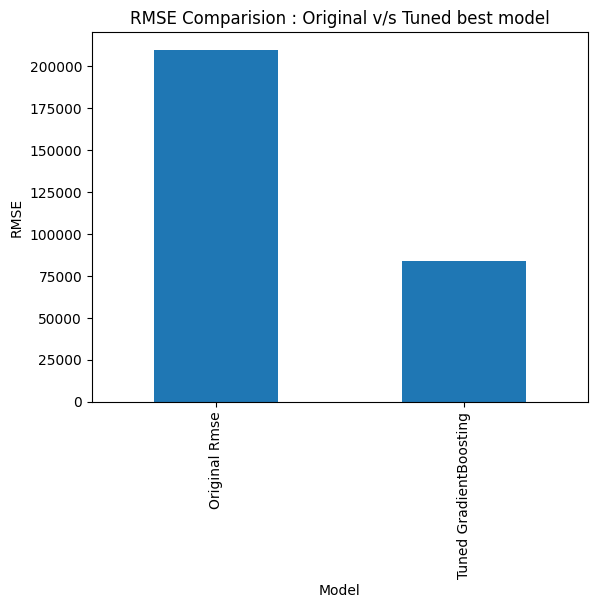

In [36]:
comparision_df.set_index('Model').plot(kind='bar', legend=False)
plt.ylabel('RMSE')
plt.title('RMSE Comparision : Original v/s Tuned best model')
plt.show()

          feature  importance
2     sqft_living    0.281009
88          grade    0.244329
7       house_age    0.086933
3        sqft_lot    0.030713
21  zipcode_98004    0.026077
31  zipcode_98023    0.023161
39  zipcode_98033    0.016486
44  zipcode_98042    0.014860
43  zipcode_98040    0.013003
58  zipcode_98092    0.012996
13         view_0    0.011653
41  zipcode_98038    0.010700
18  zipcode_98001    0.010693
5      sqft_above    0.010315
20  zipcode_98003    0.008620


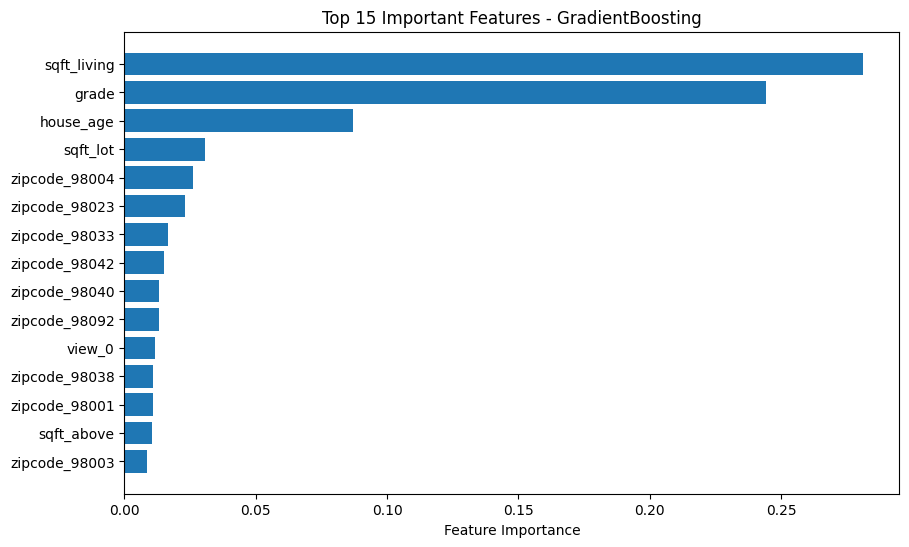

In [38]:
# Only for tree-based models
if best_model_name in ["RandomForest", "XGBoost", "GradientBoosting"]:
    # Get feature names from ColumnTransformer
    ohe = best_model.named_steps['preprocessor'].named_transformers_['cat']['encoder']
    ohe_features = list(ohe.get_feature_names_out(categorical))
    
    feature_names = numerical + ohe_features + passthrough
    
    # Extract feature importances
    importances = best_model.named_steps['regressor'].feature_importances_
    
    feat_imp = pd.DataFrame({
        "feature": feature_names,
        "importance": importances
    }).sort_values(by="importance", ascending=False)
    
    # Display top 15
    print(feat_imp.head(15))
    
    # Plot
    plt.figure(figsize=(10,6))
    plt.barh(feat_imp['feature'][:15], feat_imp['importance'][:15])
    plt.gca().invert_yaxis()
    plt.xlabel("Feature Importance")
    plt.title(f"Top 15 Important Features - {best_model_name}")
    plt.show()


### Top 5 Most important features 

1) sqft_living emerged as the strongest predictor, which makes sense because larger homes generally command higher prices.

2) grade also ranked highly, reflecting construction quality and finish — an intuitive driver of home value.

3) Certain zipcodes (e.g., zipcode_98105) appeared in the top features, highlighting that location plays a critical role in real estate pricing.

4) Interestingly, the engineered feature bath_per_bed entered the top 5, showing that the ratio of bathrooms to bedrooms captures luxury and convenience better than raw counts.

5) house_age also contributed significantly, aligning with the expectation that newer homes often sell at higher prices compared to older properties.